Batch access of all dataset (glider)
===

## Packages used
To use python to access the ERDDAP server directly from your python script or jupyter-notebook, you will need
- ERDDAPY
- Xarray
- netcdf4 
- matplotlib

```{note}
The package [**netcdf4**](http://unidata.github.io/netcdf4-python/) develop by UNIDATA is not needed in the import part of the python script. However, it is the essential package that [support netCDF format output from Xarray](https://docs.xarray.dev/en/stable/user-guide/io.html).
```

In this page, we demonstrate how to extract/download data directly on a ERDDAP server and perform data processing and visualization in python environment. 

```{tip}
[Understanding of the ERDDAP server and what it provides](erddapData) is highly recommended before reading the following intructions.
```

## Import python packages

In [1]:
# cell block designed for colab specifically
#  try import needed package
#  if failed pip install package is performed

try:
    from erddapy import ERDDAP
except ModuleNotFoundError:
    print('ModuleNotFoundError: ERDDAP')
    !pip install erddapy
try:
    import netCDF4
except ModuleNotFoundError:
    print('ModuleNotFoundError: netcdf4')
    !pip install netcdf4

In [2]:
import xarray as xr

- [**xarray**](https://docs.xarray.dev/en/stable/getting-started-guide/why-xarray.html) is used for data processing and netCDF file output. 
- [**erddapy**](https://ioos.github.io/erddapy/00-quick_intro-output.html) is used to access the ERDDAP server.

## Access IOOS Glider DAC (TableDAP) data
In this demostration, we will be getting the glider data from [IOOS Glider Data Archived Center](https://gliders.ioos.us/erddap/tabledap/allDatasets.html)

Firstly, the way to use the **erddapy** is to setup the destination ERDDAP server as an object in python through `ERDDAP` ([a python class](https://docs.python.org/3/tutorial/classes.html))

In [3]:
#### access the ERDDAP server 
e = ERDDAP(
    server="https://gliders.ioos.us/erddap/",             # The URL that the ERDDAP server has
    protocol="tabledap",                                  # The data type (griddap or tabledap)
    response="opendap",                                   # different output data type that provided by ERDDAP server       
)

By executing the above code block, we have already setup the connection with the desired ERDDAP server. 
To request a the dataset list on the server, we need to set the `dataset_id = allDatasets`(e.g. https://gliders.ioos.us/erddap/tabledap/allDatasets.html).

To set the `dataset_id`, execute

In [4]:
# set the dataset id name 
e.dataset_id = "allDatasets"

## Download data list
Now, all the setting for downloading the dataset list is complete. By executing the following, we convert the list into a pandas dataframe object that contain all the dataset info on the ERDDAP server

In [5]:
df = e.to_pandas()

Let's take a peak at the first five glider deployments

In [6]:
df.head(5)

,datasetID,accessible,institution,dataStructure,cdm_data_type,class,title,minLongitude (degrees_east),maxLongitude (degrees_east),longitudeSpacing (degrees_east),...,fgdc,iso19115,metadata,sourceUrl,infoUrl,rss,email,testOutOfDate,outOfDate,summary
0,allDatasets,public,IOOS Glider DAC,table,Other,EDDTableFromAllDatasets,* The List of All Active Datasets in this ERDD...,NaN,NaN,NaN,...,NaN,NaN,https://gliders.ioos.us/erddap/info/allDataset...,https://gliders.ioos.us/erddap,https://gliders.ioos.us/erddap,https://gliders.ioos.us/erddap/rss/allDatasets...,https://gliders.ioos.us/erddap/subscriptions/a...,NaN,NaN,This dataset is a table which has a row of inf...
1,amelia-20180501T0000,public,Virginia Institute of Marine Science - William...,table,TrajectoryProfile,EDDTableFromNcFiles,amelia-20180501T0000,-75.079579,-74.445788,NaN,...,https://gliders.ioos.us/erddap/metadata/fgdc/x...,https://gliders.ioos.us/erddap/metadata/iso191...,https://gliders.ioos.us/erddap/info/amelia-201...,(local files),https://gliders.ioos.us/erddap/,https://gliders.ioos.us/erddap/rss/amelia-2018...,https://gliders.ioos.us/erddap/subscriptions/a...,NaN,NaN,This is a test mission for the Northwest Passa...
2,amelia-20200825T1929,public,Virginia Institute of Marine Science - William...,table,TrajectoryProfile,EDDTableFromNcFiles,amelia-20200825T1929,-75.360315,-74.443807,NaN,...,https://gliders.ioos.us/erddap/metadata/fgdc/x...,https://gliders.ioos.us/erddap/metadata/iso191...,https://gliders.ioos.us/erddap/info/amelia-202...,(local files),https://gliders.ioos.us/erddap/,https://gliders.ioos.us/erddap/rss/amelia-2020...,https://gliders.ioos.us/erddap/subscriptions/a...,NaN,NaN,This project supports the deployment and realt...
3,amelia-20201015T1436,public,Virginia Institute of Marine Science - William...,table,TrajectoryProfile,EDDTableFromNcFiles,amelia-20201015T1436,-74.947858,-74.405013,NaN,...,https://gliders.ioos.us/erddap/metadata/fgdc/x...,https://gliders.ioos.us/erddap/metadata/iso191...,https://gliders.ioos.us/erddap/info/amelia-202...,(local files),https://gliders.ioos.us/erddap/,https://gliders.ioos.us/erddap/rss/amelia-2020...,https://gliders.ioos.us/erddap/subscriptions/a...,NaN,NaN,This project supports the deployment and realt...
4,amlr01-20181216T0641-delayed,public,NOAA SWFSC Antarctic Ecosystem Research Division,table,TrajectoryProfile,EDDTableFromNcFiles,amlr01-20181216T0641-delayed,-61.756371,-56.996472,NaN,...,https://gliders.ioos.us/erddap/metadata/fgdc/x...,https://gliders.ioos.us/erddap/metadata/iso191...,https://gliders.ioos.us/erddap/info/amlr01-201...,(local files),https://gliders.ioos.us/erddap/,https://gliders.ioos.us/erddap/rss/amlr01-2018...,https://gliders.ioos.us/erddap/subscriptions/a...,NaN,NaN,These data are part of the U.S. Antarctic Mari...


Now, let us create a list of dataset_id. This helps if user want to download all datasets on the server.

In [7]:
dataset_ids = []
for dataset_id in df['datasetID']:
    if dataset_id != 'allDatasets':
        dataset_ids.append(dataset_id)

The first five `dataset_id` is shown below.

In [8]:
dataset_ids[:5]

['amelia-20180501T0000',
 'amelia-20200825T1929',
 'amelia-20201015T1436',
 'amlr01-20181216T0641-delayed',
 'amlr01-20191206T0452-delayed']

## Picking one dataset to investigate on the fly

In [9]:
# e.dataset_id = 'ce_311-20190703T1802-delayed'    # feel free to uncomment and test
e.dataset_id = 'amelia-20201015T1436'            
# e.dataset_id = 'UW685-20230125T0000'             # feel free to uncomment and test
df = e.to_pandas()
ds = df.to_xarray()

/home/chsu/mambaforge/envs/cefibook/lib/python3.10/site-packages/erddapy/erddapy.py:595: DtypeWarning: Columns (34,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(data, **kw)


```{note}
Here, we try to extract the data from the server by first converting it into a Pandas dataframe then into a Xarray dataset. A direct `e.to_xarray()` would result in another data structure which is harder to visualize in this notebook.

Converting from the dataframe to the xarray helps us to convert into a gridded dataset in the later on preprocessing step. But if that is not needed, `ds = df.to_xarray()` is not a necessary step to extract the dataset from the server.
```


### Preprocessing the data
To focus on the vertical profile, we first remove row that does not contain the depth value.

In [10]:
ds_transect = ds.where(ds['depth (m)'].notnull(),drop=True)   # only preserve the profile related data

In [11]:
ds

<xarray.Dataset>
Dimensions:                                         (index: 90984)
Coordinates:
  * index                                           (index) int64 0 1 ... 90983
Data variables: (12/177)
    trajectory                                      (index) object 'amelia-20...
    wmo_id                                          (index) int64 4801934 ......
    profile_id                                      (index) int64 1602773060 ...
    time (UTC)                                      (index) object '2020-10-1...
    latitude (degrees_north)                        (index) float64 37.57 ......
    longitude (degrees_east)                        (index) float64 -74.95 .....
    ...                                              ...
    x_cycle_overrun_in_ms (msec)                    (index) float64 nan ... nan
    x_fin_deadband (rad)                            (index) float64 nan ... nan
    x_fin_max (rad)                                 (index) float64 nan ... nan
    x_lmc_xy_source (enum)                          (index) float64 nan ... nan
    x_low_power_status (nodim)                      (index) float64 nan ... nan
    x_thruster_state (enum)                         (index) float64 nan ... nan

In [12]:
ds_transect

<xarray.Dataset>
Dimensions:                                         (index: 39661)
Coordinates:
  * index                                           (index) int64 0 4 ... 90983
Data variables: (12/177)
    trajectory                                      (index) object 'amelia-20...
    wmo_id                                          (index) float64 4.802e+06...
    profile_id                                      (index) float64 1.603e+09...
    time (UTC)                                      (index) object '2020-10-1...
    latitude (degrees_north)                        (index) float64 37.57 ......
    longitude (degrees_east)                        (index) float64 -74.95 .....
    ...                                              ...
    x_cycle_overrun_in_ms (msec)                    (index) float64 nan ... nan
    x_fin_deadband (rad)                            (index) float64 nan ... nan
    x_fin_max (rad)                                 (index) float64 nan ... nan
    x_lmc_xy_source (enum)                          (index) float64 nan ... nan
    x_low_power_status (nodim)                      (index) float64 nan ... nan
    x_thruster_state (enum)                         (index) float64 nan ... nan

This imidiately decrease the table from 90984 rows to 39661 rows.

### Creating 3D plotting function
To take a quick look on the glider vertical profile, we construct a plotting function using the matplotlib package which could avoid rewriting the plotting code over and over.

In [13]:
import matplotlib.pyplot as plt

def plot_3d_view(ele_angle=-140,hori_angle=60):
    """
    This function is designed for creating axe object) for plotting the 
    3D scatter plot.

    Parameters
    ----------
    ele_angle : integer
        elevation angle of viewing the 3D scatter plot
    hori_angle : integer
        horizontal angle of viewing the 3D scatter plot
    Returns
    -------
    ax : matplotlib axe object
        the axe object that can apply scatter3D method 

    Raises
    ------
    """
    fig = plt.figure(figsize=(5,5))
    ax = plt.axes([0,0,1.5,1],projection = '3d')
    ax.view_init(ele_angle, hori_angle)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Depth')
    return ax

### Plotting a subset of the dataset and focusing on single variables
- temperature profile along the glider path

In [14]:
ds_part=ds_transect
varname='temperature (Celsius)'
zname='depth (m)'
yname='latitude (degrees_north)'
xname='longitude (degrees_east)'

KeyError: 'temperature (Celsius)'

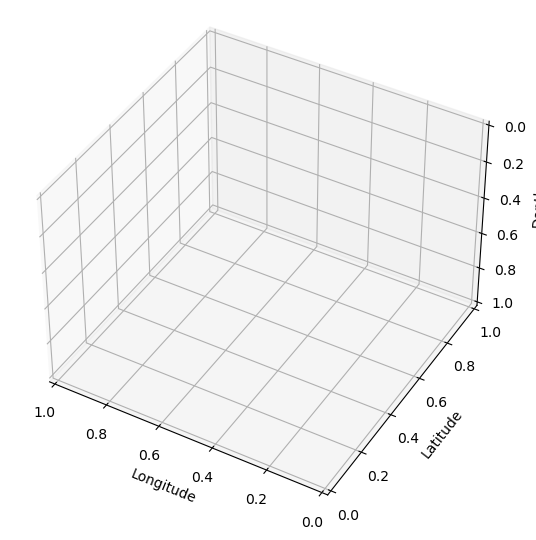

In [15]:
ax2 = plot_3d_view(ele_angle=-140,hori_angle=60)
p = ax2.scatter3D(ds_part[xname],
              ds_part[yname],
              ds_part[zname],
              c=ds_part[varname],      # color value of individual points is taken from their heights
              cmap="viridis"                           # the color mapping to be used. Other example options: winter, autumn, ...
              );
# ax2.invert_zaxis()
ax2.invert_xaxis()
cbar = plt.colorbar(p)
cbar.set_label(varname)

- salinity profile along the glider path

In [ ]:
varname='salinity (0.001)'
zname='depth (m)'
yname='latitude (degrees_north)'
xname='longitude (degrees_east)'

In [ ]:
ax2 = plot_3d_view(ele_angle=-160,hori_angle=110)
p = ax2.scatter3D(ds_part[xname],
              ds_part[yname],
              ds_part[zname],
              c=ds_part[varname],      # color value of individual points is taken from their heights
              cmap="viridis"                           # the color mapping to be used. Other example options: winter, autumn, ...
              );
# ax2.invert_zaxis()
ax2.invert_xaxis()
cbar = plt.colorbar(p)
cbar.set_label(varname)

### Showing the geopgraphic location of the glider path

In [ ]:
import folium
import numpy as np

lon = ds_part[xname].data
lat = ds_part[yname].data


fmap = folium.Map(location=[(np.min(lat)+np.max(lat))/2, (np.min(lon)+np.max(lon))/2], tiles="OpenStreetMap", zoom_start=8)
points = [[lat[i],lon[i]] for i in range(len(lon)) ]
folium.PolyLine(points, color='red', weight=2.5, opacity=0.4,popup=f'{dataset_id}').add_to(fmap)
folium.Marker([lat[0],lon[0]], popup=f'start').add_to(fmap)
folium.Marker([lat[-1],lon[-1]], popup=f'end').add_to(fmap)
    
fmap

## Converting the table data to gridded data

In [ ]:
import numpy as np
import pandas as pd

# idealy/theoretically the three array should have same len (first dimension)
# lat = np.unique(ds_transect['latitude (degrees_north)'].data)
# lon = np.unique(ds_transect['longitude (degrees_east)'].data)
time = np.unique(ds_transect['time (UTC)'].data)
dtime = pd.to_datetime(time)

In [ ]:
# vertical profile (second dimension)
depth = np.unique(ds_transect['depth (m)'].data)

In [ ]:
# create 2D gridded array for vertical profile along the glider trajectory
da_transect = xr.DataArray(
    coords={
        "depth": depth,
        "time": dtime.values,
        # "lon": ("time", lon),  # place holder not real lon at the associated time
        # "lat": ("time", lat),  # place holder not real lat at the associated time
    },
    dims=["depth", "time"],
)
da_transect = da_transect.rename('var')

In [ ]:
len(time)

To convert the row data into gridded data, the following process do 
1. for each single time profiling, we take all the vertical measurement
2. for each single time profiling, we mean the measurement on the same vertical level
3. if multiple location is registered during the vertical profiling, we use the first recorded location as the profiling location
4. the veritical profile is linearly interpolated to make every vertical profiling to have the same number of grid

In [ ]:
# we minimized the number of time profiling that needed to be processed to gridded data in this notebook (efficiency)
print(f'processing {varname}')
for i in range(len(time[:20])):
    print(time[i])
    loc_time = time[i]
    
    # only preserve single time (mid point time during the profiling)
    ds_temp = ds_transect.where((ds['time (UTC)'] == loc_time),drop=True)
    ds_temp = ds_temp.assign_coords({'depth':ds_temp['depth (m)']})
    
    # group mean the value for up and down profiling (single depth single value)
    ds_temp = ds_temp.groupby('depth (m)').mean()
    
#     loc_lat = np.unique(ds_temp['latitude (degrees_north)'].data)
#     loc_lon = np.unique(ds_temp['longitude (degrees_east)'].data)
#     if (len(loc_lat)>1) | (len(loc_lon)>1) :
#         print('multiple location at a single time (first point used)')
#         da_transect['lon'][i] = loc_lon[0]
#         da_transect['lat'][i] = loc_lat[0]
#     else:
#         da_transect['lon'][i] = loc_lon[0]
#         da_transect['lat'][i] = loc_lat[0]
        
    # create profile data array to store profiling at one location
    da_var = xr.DataArray(
        ds_temp[varname].data,
        coords={"depth": ds_temp['depth (m)'].data},
        dims=["depth"]
    )
    da_var = da_var.rename('var')

    # put the single profiling to the 2D gridded dataarray
    da_var = da_var.interp(
        depth=depth,
        method="linear",
        kwargs={"fill_value": np.nan},
    )
    da_transect[:,i] = da_var 
    # da_transect[:,i] = xr.merge([da_transect[:,i],da_var])['var'] # merge help fill in the NaN in missing profiling

In [ ]:
da_transect

## Plotting the gridded data

In [ ]:
da_transect.where(da_transect.notnull(),drop=True).plot(yincrease=False, x='time', y='depth')